In [34]:
for excercise in excercises:
    with open(f'./output/{excercise}/{excercise}.pkl', 'rb') as f:
        data = pickle.load(f)
        joints_data = data['data']

In [37]:
np.array(joints_data[0])

array([[612.75977   , 250.51996   ,   0.91520643],
       [612.4514    , 250.24399   ,   0.9299615 ],
       [612.27734   , 250.40833   ,   0.932754  ],
       ...,
       [570.6763    , 371.98724   ,   0.90761197],
       [571.0362    , 371.1546    ,   0.9027786 ],
       [571.65533   , 369.24982   ,   0.89196974]],
      shape=(929, 3), dtype=float32)

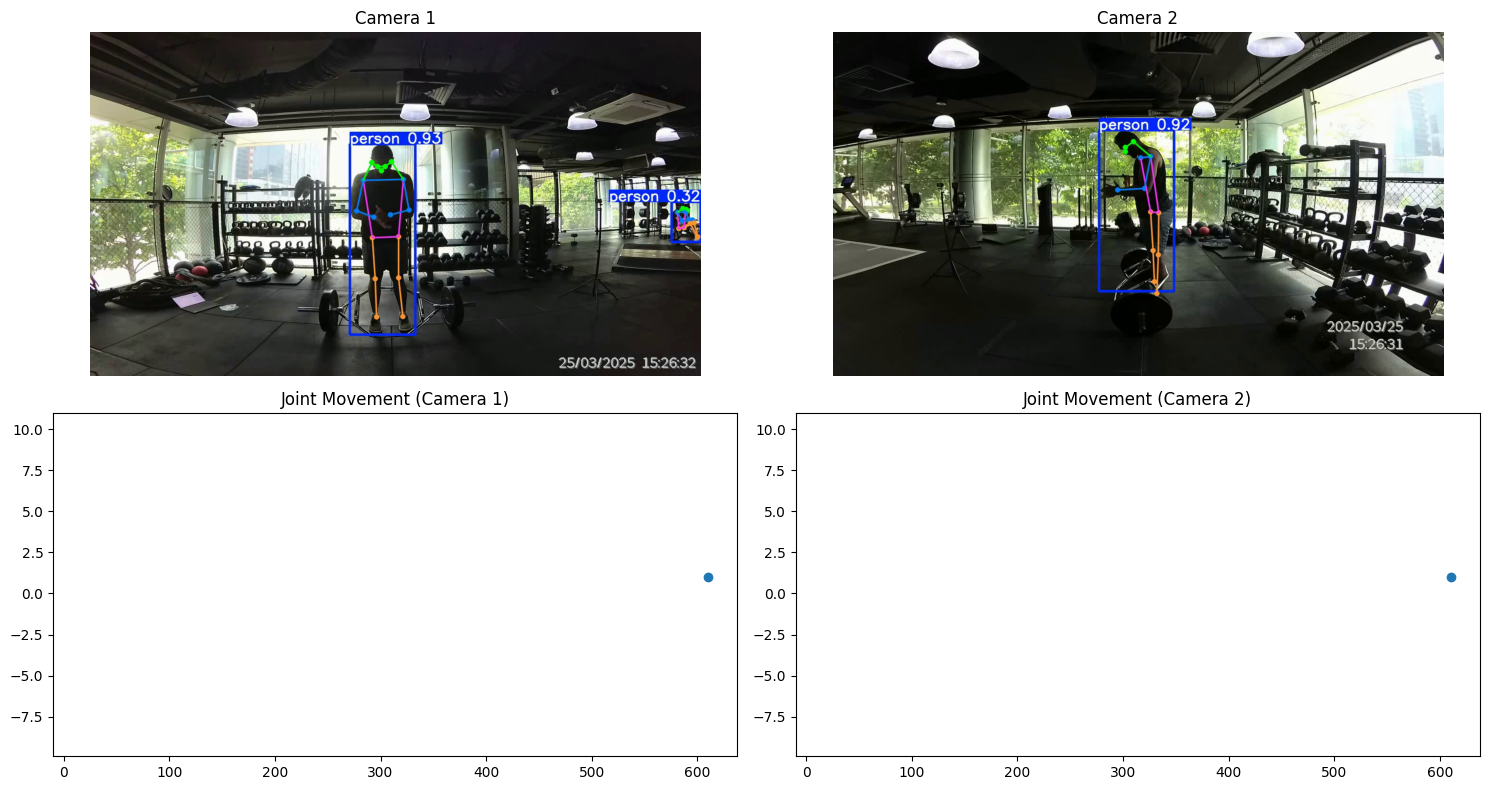

In [42]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Video paths
excercises = ['1-frontcut', '1-leftcut']
video_paths = [f'./output/{excercise}/{excercise}.mp4' for excercise in excercises]
cap = [cv2.VideoCapture(vp) for vp in video_paths]

# Load skeleton data (example format)
# 현재는 첫번째 운동의 데이터만 사용합니다.
with open(f'./output/{excercises[0]}/{excercises[0]}.pkl', 'rb') as f:
    data = pickle.load(f)
    joints_data = np.array(data['data'][0])  # (# frames, 3)

frames = joints_data.shape[0]

N_VIDEOS = len(video_paths)
fig, axs = plt.subplots(2, N_VIDEOS, figsize=(15, 8))

img_plots = []
for i in range(N_VIDEOS):
    ret, frame = cap[i].read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img_plot = axs[0, i].imshow(frame_rgb)
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Camera {i+1}')
    img_plots.append(img_plot)

# joints_data의 x (joint[0])와 z (joint[2]) 좌표의 범위에 맞게 축을 설정
x_min, x_max = np.min(joints_data[:, 0]), np.max(joints_data[:, 0])
z_min, z_max = np.min(joints_data[:, 2]), np.max(joints_data[:, 2])
margin = 10  # 여유 공간

skeleton_plots = []
for i in range(N_VIDEOS):
    skel_plot, = axs[1, i].plot([], [], 'o-', lw=2)
    axs[1, i].set_xlim(x_min - margin, x_max + margin)
    axs[1, i].set_ylim(z_min - margin, z_max + margin)
    axs[1, i].set_title(f'Joint Movement (Camera {i+1})')
    skeleton_plots.append(skel_plot)

# Index of the joint to visualize (현재는 하나의 관절만 사용)
joint_idx = 0

def update(frame_idx):
    for i in range(N_VIDEOS):
        ret, frame = cap[i].read()
        if ret:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img_plots[i].set_data(frame_rgb)
        
        # 해당 프레임의 관절 좌표 가져오기 (x, y, z)
        joint = joints_data[frame_idx]
        # set_data는 x, y값을 시퀀스로 받아야 하므로 리스트로 전달
        skeleton_plots[i].set_data([joint[0]], [joint[2]])
    
    return img_plots + skeleton_plots

ani = animation.FuncAnimation(fig, update, frames=frames, interval=50, blit=True)
plt.tight_layout()
plt.show()

# 비디오 캡쳐 객체 해제
for c in cap:
    c.release()


In [43]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Video paths
excercises = ['1-frontcut', '1-leftcut']
video_paths = [f'./output/{excercise}/{excercise}.mp4' for excercise in excercises]
cap = [cv2.VideoCapture(vp) for vp in video_paths]

# 첫번째 운동의 skeleton 데이터 불러오기
with open(f'./output/{excercises[0]}/{excercises[0]}.pkl', 'rb') as f:
    data = pickle.load(f)
    joints_data = np.array(data['data'][0])  # (# frames, 3)

frames = joints_data.shape[0]

N_VIDEOS = len(video_paths)
fig, axs = plt.subplots(2, N_VIDEOS, figsize=(15, 8))

img_plots = []
for i in range(N_VIDEOS):
    ret, frame = cap[i].read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img_plot = axs[0, i].imshow(frame_rgb)
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Camera {i+1}')
    img_plots.append(img_plot)

# joints_data의 x, z 좌표의 범위에 맞춰 축 범위 설정
x_min, x_max = np.min(joints_data[:, 0]), np.max(joints_data[:, 0])
z_min, z_max = np.min(joints_data[:, 2]), np.max(joints_data[:, 2])
margin = 10  # 여유 공간

skeleton_plots = []
for i in range(N_VIDEOS):
    skel_plot, = axs[1, i].plot([], [], 'o-', lw=2)
    axs[1, i].set_xlim(x_min - margin, x_max + margin)
    axs[1, i].set_ylim(z_min - margin, z_max + margin)
    axs[1, i].set_title(f'Joint Movement (Camera {i+1})')
    skeleton_plots.append(skel_plot)

# 관절 번호 (여기서는 하나의 관절만 사용)
joint_idx = 0

def update(frame_idx):
    for i in range(N_VIDEOS):
        ret, frame = cap[i].read()
        if ret:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img_plots[i].set_data(frame_rgb)
        # 현재 프레임의 관절 좌표 가져오기 (x, y, z)
        joint = joints_data[frame_idx]
        # 단일 점이라도 리스트 형태로 전달
        skeleton_plots[i].set_data([joint[0]], [joint[2]])
    return img_plots + skeleton_plots

ani = animation.FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

# 저장을 위해 ffmpeg가 시스템에 설치되어 있어야 합니다.
# FFMpegWriter 사용
writer = animation.FFMpegWriter(fps=20, metadata=dict(artist='Your Name'), bitrate=1800)
ani.save("output_video.mp4", writer=writer)

# 저장 후 창 닫기
plt.close(fig)

# 비디오 캡쳐 객체 해제
for c in cap:
    c.release()


In [45]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# --- 설정 ---
excercises = ['1-frontcut', '1-leftcut', '1-rightcut']
video_paths = [f'./output/{excercise}/{excercise}.mp4' for excercise in excercises]

# 각 비디오에 대해 VideoCapture와 skeleton data 로드
caps = [cv2.VideoCapture(vp) for vp in video_paths]
joints_data_list = []
for excercise in excercises:
    with open(f'./output/{excercise}/{excercise}.pkl', 'rb') as f:
        data = pickle.load(f)
        # 각 pkl 파일의 skeleton 데이터 중 하나의 관절(예: 0번)의 데이터를 사용 (shape: [n_frames, 3])
        joints_data = np.array(data['data'][0])
        joints_data_list.append(joints_data)

# 모든 비디오 중 최소 프레임 수를 사용 (비디오 길이가 다를 경우)
frames = min(joints.shape[0] for joints in joints_data_list)

# 첫번째 비디오의 fps로 interval 설정 (비디오 속도 개선)
fps = caps[0].get(cv2.CAP_PROP_FPS)
if fps == 0:  # fps 정보를 못 읽어올 경우 기본값 30fps 사용
    fps = 30
interval = int(1000 / fps)

N_VIDEOS = len(video_paths)
fig, axs = plt.subplots(2, N_VIDEOS, figsize=(15, 8))

# --- 1행: 비디오 프레임 ---
img_plots = []
for i in range(N_VIDEOS):
    ret, frame = caps[i].read()
    if not ret:
        frame = np.zeros((480, 640, 3), dtype=np.uint8)  # 읽기 실패 시 검은 화면
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img_plot = axs[0, i].imshow(frame_rgb)
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Camera {i+1}')
    img_plots.append(img_plot)

# --- 2행: 관절의 y좌표 변화 (x축=프레임, y축=관절 y 좌표) ---
line_plots = []
for i in range(N_VIDEOS):
    line_plot, = axs[1, i].plot([], [], 'o-', lw=2)
    axs[1, i].set_xlim(0, frames)
    # 해당 비디오의 관절 y 좌표 전체 범위 계산 (여기서 y좌표는 인덱스 1)
    y_vals = joints_data_list[i][:, 1]
    margin = 10
    axs[1, i].set_ylim(np.min(y_vals)-margin, np.max(y_vals)+margin)
    axs[1, i].set_xlabel('Frame')
    axs[1, i].set_ylabel('Joint Y Coordinate')
    axs[1, i].set_title(f'Joint Y over Frames (Camera {i+1})')
    line_plots.append(line_plot)

# 각 비디오별로 누적 데이터 저장할 리스트 초기화
accumulated_frames = [[] for _ in range(N_VIDEOS)]
accumulated_y = [[] for _ in range(N_VIDEOS)]

# 어떤 관절의 정보를 사용할지 (여기서는 y좌표이므로, data[:,1] 사용)
joint_idx = 0  # 관절 번호 (0번 관절을 선택)

def update(frame_idx):
    for i in range(N_VIDEOS):
        # 비디오 프레임 업데이트
        ret, frame = caps[i].read()
        if ret:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img_plots[i].set_data(frame_rgb)
        else:
            print(f"Camera {i+1} ended at frame {frame_idx}.")
        
        # 해당 프레임의 관절 y좌표 업데이트 (누적해서 그리기)
        joint = joints_data_list[i][frame_idx]
        accumulated_frames[i].append(frame_idx)
        accumulated_y[i].append(joint[1])  # y좌표 (index 1)
        line_plots[i].set_data(accumulated_frames[i], accumulated_y[i])
    return img_plots + line_plots

ani = animation.FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)
plt.tight_layout()

# 비디오 파일로 저장 (ffmpeg 설치 필요)
writer = animation.FFMpegWriter(fps=fps, metadata=dict(artist='Your Name'), bitrate=1800)
ani.save("output_video.mp4", writer=writer)

plt.close(fig)

# 캡처 객체 해제
for cap in caps:
    cap.release()


Camera 1 ended at frame 925.
Camera 2 ended at frame 925.
Camera 1 ended at frame 926.
Camera 2 ended at frame 926.
Camera 3 ended at frame 926.
Camera 1 ended at frame 927.
Camera 2 ended at frame 927.
Camera 3 ended at frame 927.
Camera 1 ended at frame 928.
Camera 2 ended at frame 928.
Camera 3 ended at frame 928.


In [48]:
import cv2
import pickle
import numpy as np
import matplotlib
matplotlib.use('Agg')  # 백엔드 Agg 사용
import matplotlib.pyplot as plt
import time

# --- 설정 ---
exercises = ['1-frontcut', '1-leftcut', '1-rightcut']
video_paths = [f'./output/{excercise}/{excercise}.mp4' for excercise in exercises]

# 1. 비디오 프레임 미리 로드 (preload)
video_frames = []
for vp in video_paths:
    cap = cv2.VideoCapture(vp)
    frames_list = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # 매 프레임마다 색공간 변환을 한 번만 수행하여 저장
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames_list.append(frame_rgb)
    cap.release()
    video_frames.append(frames_list)

# 2. 각 비디오의 스켈레톤 데이터 로드 (예: 첫 번째 관절 데이터 사용; shape: [n_frames, 3])
joints_data_list = []
for excercise in exercises:
    with open(f'./output/{excercise}/{excercise}.pkl', 'rb') as f:
        data = pickle.load(f)
        joints_data = np.array(data['data'][0])
        joints_data_list.append(joints_data)

# 3. 모든 비디오와 스켈레톤 데이터의 최소 프레임 수 사용 (동기화를 위해)
min_frames_video = min(len(frames) for frames in video_frames)
min_frames_skel = min(joints.shape[0] for joints in joints_data_list)
frames = min(min_frames_video, min_frames_skel)

# --- 프레임 스킵 설정 ---
frame_skip = 2  # 예: 2프레임마다 한 프레임 처리 (전체 프레임의 절반만 사용)
new_frames = list(range(0, frames, frame_skip))
new_total_frames = len(new_frames)

# 4. FPS 정보 읽기 (첫 번째 비디오 기준; 읽어오지 못하면 30fps 사용)
cap_temp = cv2.VideoCapture(video_paths[0])
fps = cap_temp.get(cv2.CAP_PROP_FPS)
if fps == 0:
    fps = 30
cap_temp.release()

# 효과적인 출력 FPS (원본 fps에서 frame_skip 비율로 낮춤)
new_fps = fps / frame_skip

# --- Matplotlib Figure 구성 ---
N_VIDEOS = len(video_paths)
fig, axs = plt.subplots(2, N_VIDEOS, figsize=(15, 8))

# 상단: 비디오 프레임 표시
img_plots = []
for i in range(N_VIDEOS):
    first_frame = video_frames[i][0]
    img_plot = axs[0, i].imshow(first_frame)
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Camera {i+1}')
    img_plots.append(img_plot)

# 하단: 관절 y좌표 변화 (x축=프레임 index, y축=관절 y 좌표)
line_plots = []
for i in range(N_VIDEOS):
    line_plot, = axs[1, i].plot([], [], 'o-', lw=2)
    axs[1, i].set_xlim(0, new_total_frames)
    y_vals = joints_data_list[i][:, 1]  # y 좌표 (index 1)
    margin = 10
    axs[1, i].set_ylim(np.min(y_vals)-margin, np.max(y_vals)+margin)
    axs[1, i].set_xlabel('Frame')
    axs[1, i].set_ylabel('Joint Y Coordinate')
    axs[1, i].set_title(f'Joint Y over Frames (Camera {i+1})')
    line_plots.append(line_plot)

# 하단 누적 데이터 초기화 (각 카메라별 누적 frame index와 y좌표 저장)
accumulated_frames = [[] for _ in range(N_VIDEOS)]
accumulated_y = [[] for _ in range(N_VIDEOS)]

# --- cv2.VideoWriter 설정 ---
fig.canvas.draw()
s, (width, height) = fig.canvas.print_to_buffer()
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter("output_video.mp4", fourcc, new_fps, (width, height))

start_time = time.time()
for idx, frame_idx in enumerate(new_frames):
    for i in range(N_VIDEOS):
        # 상단: 미리 로드한 비디오 프레임 사용
        img_plots[i].set_data(video_frames[i][frame_idx])
        # 하단: 해당 프레임의 관절 y 좌표 누적 업데이트
        joint_y = joints_data_list[i][frame_idx][1]
        accumulated_frames[i].append(idx)  # 새로운 frame index (누적용)
        accumulated_y[i].append(joint_y)
        line_plots[i].set_data(accumulated_frames[i], accumulated_y[i])
    
    # Figure를 canvas에 그린 후 버퍼에서 이미지 배열로 변환
    fig.canvas.draw()
    s, (width, height) = fig.canvas.print_to_buffer()
    frame_image = np.frombuffer(s, dtype=np.uint8).reshape(height, width, 4)
    # RGBA -> BGR 변환 (OpenCV는 BGR 포맷 사용)
    frame_image = cv2.cvtColor(frame_image, cv2.COLOR_RGBA2BGR)
    
    video_writer.write(frame_image)
    
    if idx % 50 == 0:
        elapsed = time.time() - start_time
        print(f"Processed frame {idx}/{new_total_frames} in {elapsed:.2f} seconds")

video_writer.release()
plt.close(fig)
print("Video saved as output_video.mp4")


Processed frame 0/465 in 0.25 seconds
Processed frame 50/465 in 12.38 seconds
Processed frame 100/465 in 24.41 seconds
Processed frame 150/465 in 36.52 seconds
Processed frame 200/465 in 48.64 seconds
Processed frame 250/465 in 60.83 seconds
Processed frame 300/465 in 73.02 seconds
Processed frame 350/465 in 85.28 seconds
Processed frame 400/465 in 97.56 seconds
Processed frame 450/465 in 109.89 seconds
Video saved as output_video.mp4


In [53]:
excercises = ['1-frontcut', '1-leftcut', '1-rightcut']
for e in excercises[1:2]:
    with open(f'./output/{e}/{e}.pkl', 'rb') as f:
        data = pickle.load(f)
        joints_data = np.array(data['data'][15])  # (# frames, 3)
        confidence_data = np.array(data['conf'][15])
plt.plot(confidence_data)
plt.show()

C:\Users\이기창\AppData\Local\Temp\ipykernel_34772\4133921436.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
